In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from scipy.fftpack import dct

warnings.filterwarnings('ignore')

In [3]:
# prepare final dataset schema
gen_edm = []
gen_pop = []
gen_rap = []
gen_rnb = []
gen_rock = []

# title
# artist
# copyright
# audio_path
# sampling_rate
# genre
# original_signal
# emphasis_signal
# framed_windowed_signal
# fft_signal
# mel_signal
# dct_signal
# final_features

def update_schema(schema, csv, genre):
  df = pd.read_csv(csv, index_col=False)
  for i, row in df.iterrows():
    signal, sample_rate = librosa.load(f"audio/{genre}/{row['title']}.mp3")
    data = {
      "title": row['title'],
      "artist": row['artist'],
      "copyright": row['copyright'],
      "audio_path": f"audio/{genre}/{row['title']}.mp3",
      "sampling_rate": sample_rate,
      "genre": genre,
      "original_signal": signal,
      "emphasis_signal": None,
      "framed_windowed_signal": None,
      "fft_signal": None,
      "mel_signal": None,
      "dct_signal": None,
      "final_features": None
    }
    schema.append(data)
    
# update_schema(schema=gen_edm, csv="csv/edm.csv", genre="edm")
# update_schema(schema=gen_rnb, csv="csv/rnb.csv", genre="rnb")
# update_schema(schema=gen_pop, csv="csv/pop.csv", genre="pop")
update_schema(schema=gen_rap, csv="csv/rap.csv", genre="rap")
update_schema(schema=gen_rock, csv="csv/rock.csv", genre="rock")


[src/libmpg123/id3.c:process_extra():684] error: No extra frame text / valid description?
[src/libmpg123/id3.c:process_extra():684] error: No extra frame text / valid description?
[src/libmpg123/id3.c:process_extra():684] error: No extra frame text / valid description?
[src/libmpg123/id3.c:process_extra():684] error: No extra frame text / valid description?
[src/libmpg123/id3.c:process_extra():684] error: No extra frame text / valid description?
[src/libmpg123/id3.c:process_extra():684] error: No extra frame text / valid description?
[src/libmpg123/id3.c:process_extra():684] error: No extra frame text / valid description?
[src/libmpg123/id3.c:process_extra():684] error: No extra frame text / valid description?
[src/libmpg123/id3.c:process_extra():684] error: No extra frame text / valid description?
[src/libmpg123/id3.c:process_extra():684] error: No extra frame text / valid description?
[src/libmpg123/id3.c:process_extra():684] error: No extra frame text / valid description?
[src/libmp

In [5]:
pd.DataFrame(gen_rap)

,title,artist,copyright,audio_path,sampling_rate,genre,original_signal,emphasis_signal,framed_windowed_signal,fft_signal,mel_signal,dct_signal,final_features
0,Super Bass,Nicki Minaj,Song: Nicki Minaj - Super Bass Watch: http://y...,audio/rap/Super Bass.mp3,22050,rap,"[1.1641532e-10, 4.3655746e-11, -2.910383e-11, ...",None,None,None,None,None,None
1,Still D.R.E.,Dr. Dre (ft. Snoop Dogg),Song: Dr. Dre (ft. Snoop Dogg) - Still D.R.E. ...,audio/rap/Still D.R.E..mp3,22050,rap,"[-1.214109e-10, 1.3803932e-10, -7.691869e-11, ...",None,None,None,None,None,None
2,Woo Hah!! Got You All in Check,Busta Rhymes,Song: Busta Rhymes - Woo Hah!! Got You All in ...,audio/rap/Woo Hah!! Got You All in Check.mp3,22050,rap,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None,None,None,None,None,None
3,Life Of Da Party,Snoop Dogg (ft. Too Short & Mistah F.A.B),Song: Snoop Dogg (ft. Too Short & Mistah F.A.B...,audio/rap/Life Of Da Party.mp3,22050,rap,"[0.0004771948, -0.00016430765, 0.00040832162, ...",None,None,None,None,None,None
4,Microphone Anthem,Saint Loco,Song: Saint Loco - Microphone Anthem Watch: ht...,audio/rap/Microphone Anthem.mp3,22050,rap,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None,None,None,None,None,None
5,my name is,Eminem,Song: Eminem - My Name Is Watch: http://youtu....,audio/rap/my name is.mp3,22050,rap,"[1.1517261e-07, 8.524387e-08, 2.3556026e-08, -...",None,None,None,None,None,None
6,Like Toy Soldiers (1),Eminem,Song: Eminem - Like Toy Soldiers Watch: http:/...,audio/rap/Like Toy Soldiers (1).mp3,22050,rap,"[8.3982995e-06, -9.773512e-07, 1.5122282e-06, ...",None,None,None,None,None,None
7,Everybody,Logic,Song: Logic – Everybody Watch: http://youtu.be...,audio/rap/Everybody.mp3,22050,rap,"[5.1767324e-06, -1.5329279e-06, 4.118958e-06, ...",None,None,None,None,None,None
8,So Many Tears,Tupac Shakur,Song: Tupac Shakur - So Many Tears Watch: http...,audio/rap/So Many Tears.mp3,22050,rap,"[-5.322818e-10, 1.8262654e-09, 9.513315e-10, 1...",None,None,None,None,None,None
9,Keep Ya Head Up,Tupac Shakur,Song: Tupac Shakur - Keep Ya Head Up Watch: ht...,audio/rap/Keep Ya Head Up.mp3,22050,rap,"[-1.4629331e-06, -8.500501e-07, -1.6834529e-06...",None,None,None,None,None,None


## MFCC

### Pre emphasis

In [6]:
# pre emphasis
pre_emphasis = 0.97
def emphasis(signal):
  return np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

def apply_emphasis(schema):
  for data in schema:
    data['emphasis_signal'] = emphasis(data['original_signal'])
  
# apply_emphasis(gen_edm)
# apply_emphasis(gen_pop)
# apply_emphasis(gen_rnb)
apply_emphasis(gen_rock)
apply_emphasis(gen_rap)

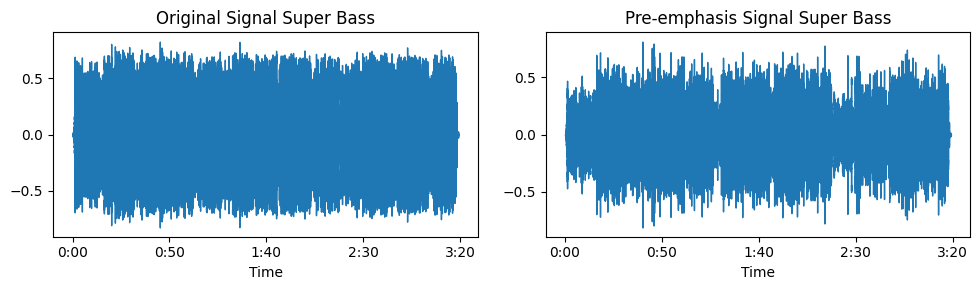

In [7]:
# plotting
plot_original_name, plot_original_signal, plot_original_sr =gen_rap[0]['title'], gen_rap[0]['original_signal'], gen_rap[0]['sampling_rate']
plot_emphasis_name, plot_emphasis_signal, plot_emphasis_sr = gen_rap[0]['title'], gen_rap[0]['emphasis_signal'], gen_rap[0]['sampling_rate']

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
librosa.display.waveshow(plot_original_signal, sr=plot_original_sr)
plt.title(f'Original Signal {plot_original_name}')

plt.subplot(1, 2, 2)
librosa.display.waveshow(plot_emphasis_signal, sr=plot_emphasis_sr)
plt.title(f'Pre-emphasis Signal {plot_emphasis_name}')

plt.tight_layout()

### Framing & Windowing

In [8]:
frame_size = 0.025
frame_stride = 0.01

def framing(emphasized_signal, sr):
  frame_length, frame_step = frame_size * sr, frame_stride * sr  # Convert from seconds to samples
  signal_length = len(emphasized_signal)
  frame_length = int(round(frame_length))
  frame_step = int(round(frame_step))
  num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

  pad_signal_length = num_frames * frame_step + frame_length
  z = np.zeros((pad_signal_length - signal_length))
  pad_signal = np.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

  indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
  return pad_signal[indices.astype(np.int32, copy=False)]

def windowing(framing_signal, windowing_sr):
  return framing_signal * np.hamming(frame_size * windowing_sr)

def apply_framing_windowing(schema):
  for data in schema:
    framed_signal = framing(data['emphasis_signal'], data['sampling_rate'])
    windowed_signal = windowing(framed_signal, data['sampling_rate'])
    data['framed_windowed_signal'] = windowed_signal
    
apply_framing_windowing(gen_rap)
apply_framing_windowing(gen_rock)

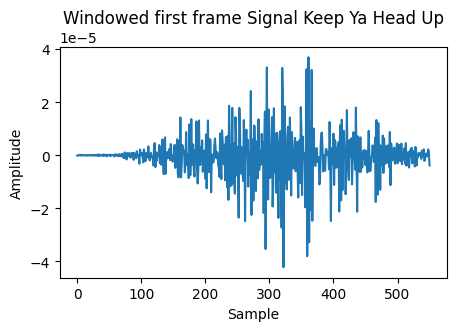

In [9]:
plot_framing_windowing_signal, plot_framing_windowing_name = gen_rap[9]['framed_windowed_signal'][0], gen_rap[9]['title']
plt.figure(figsize=(5, 3))
plt.plot(plot_framing_windowing_signal)
plt.title(f'Windowed first frame Signal {plot_framing_windowing_name}')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

### FFT

In [10]:
NFFT = 512
def fft(framed_windowed_signal):
  mag_frames = np.absolute(np.fft.rfft(framed_windowed_signal, NFFT))  # Magnitude of the FFT
  pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum
  return pow_frames

def apply_fft(schema):
  for data in schema:
    data['fft_signal'] = fft(data['framed_windowed_signal'])
    print(f"fft {data['genre']}/{data['title']} done...")
    
# apply_fft(gen_edm)
# apply_fft(gen_pop)
# apply_fft(gen_rnb)
apply_fft(gen_rock)
apply_fft(gen_rap)


fft rock/The Animals - House Of The Rising Sun done...
fft rock/The Byrds - Eight Miles High done...
fft rock/Steely Dan - Do It Again done...
fft rock/Queen - Bohemian Rhapsody (2011 Mix) done...
fft rock/Foreigner - Cold as Ice (2008 Remaster) done...
fft rock/Yes - Owner of a Lonely Heart done...
fft rock/Jefferson Airplane - White Rabbit done...
fft rock/Carole King - I Feel the Earth Move done...
fft rock/Elvis Presley - Suspicious Minds (Remastered) done...
fft rock/The Kinks - Rats done...
fft rock/Rod Stewart - Maggie May (Remastered Version) done...
fft rock/AC_DC - Back In Black done...
fft rock/Crosby, Stills, Nash & Young - Our House done...
fft rock/Elton John - I'm Still Standing done...
fft rock/The Rolling Stones - Brown Sugar (2009 Mix) done...
fft rock/The Monkees - Last Train to Clarksville done...
fft rock/The Doobie Brothers - Listen to the Music (Single Version; 2006 Remaster) done...
fft rock/Dire Straits - Sultans of Swing done...
fft rock/Lou Reed - Walk On the

In [ ]:
pd.DataFrame(gen_edm)

### Mel Filterbank

In [12]:
nfilt = 40

def melbanks(pow_frames, sr):
  low_freq_mel = 0
  high_freq_mel = (2595 * np.log10(1 + (sr / 2) / 700))  # Convert Hz to Mel
  mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
  hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
  bin = np.floor((NFFT + 1) * hz_points / sr)

  fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
  for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
      fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
      fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
  filter_banks = np.dot(pow_frames, fbank.T)
  filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
  return 20 * np.log10(filter_banks)

def apply_melbanks(schema):
  for data in schema:
    data['mel_signal'] = melbanks(data['fft_signal'], data['sampling_rate'])
    print(f"mel {data['genre']}/{data['title']} done...")

# apply_melbanks(gen_edm)
# apply_melbanks(gen_pop)
# apply_melbanks(gen_rnb)
apply_melbanks(gen_rock)
apply_melbanks(gen_rap)

mel rock/The Animals - House Of The Rising Sun done...
mel rock/The Byrds - Eight Miles High done...
mel rock/Steely Dan - Do It Again done...
mel rock/Queen - Bohemian Rhapsody (2011 Mix) done...
mel rock/Foreigner - Cold as Ice (2008 Remaster) done...
mel rock/Yes - Owner of a Lonely Heart done...
mel rock/Jefferson Airplane - White Rabbit done...
mel rock/Carole King - I Feel the Earth Move done...
mel rock/Elvis Presley - Suspicious Minds (Remastered) done...
mel rock/The Kinks - Rats done...
mel rock/Rod Stewart - Maggie May (Remastered Version) done...
mel rock/AC_DC - Back In Black done...
mel rock/Crosby, Stills, Nash & Young - Our House done...
mel rock/Elton John - I'm Still Standing done...
mel rock/The Rolling Stones - Brown Sugar (2009 Mix) done...
mel rock/The Monkees - Last Train to Clarksville done...
mel rock/The Doobie Brothers - Listen to the Music (Single Version; 2006 Remaster) done...
mel rock/Dire Straits - Sultans of Swing done...
mel rock/Lou Reed - Walk On the

In [ ]:
pd.DataFrame(gen_pop)

### DCT

In [13]:
num_ceps = 12
cep_lifter = 22

def features(mel_signal):
  mfcc = dct(mel_signal, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13
  (nframes, ncoeff) = mfcc.shape
  n = np.arange(ncoeff)
  lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n / cep_lifter)
  mfcc *= lift
  return mfcc

def apply_features(schema):
  for data in schema:
    data['dct_signal'] = features(data['mel_signal'])
    print(f"dct {data['genre']}/{data['title']} done...")


# apply_features(gen_edm)
# apply_features(gen_pop)
# apply_features(gen_rnb)
apply_features(gen_rock)
apply_features(gen_rap)


dct rock/The Animals - House Of The Rising Sun done...
dct rock/The Byrds - Eight Miles High done...
dct rock/Steely Dan - Do It Again done...
dct rock/Queen - Bohemian Rhapsody (2011 Mix) done...
dct rock/Foreigner - Cold as Ice (2008 Remaster) done...
dct rock/Yes - Owner of a Lonely Heart done...
dct rock/Jefferson Airplane - White Rabbit done...
dct rock/Carole King - I Feel the Earth Move done...
dct rock/Elvis Presley - Suspicious Minds (Remastered) done...
dct rock/The Kinks - Rats done...
dct rock/Rod Stewart - Maggie May (Remastered Version) done...
dct rock/AC_DC - Back In Black done...
dct rock/Crosby, Stills, Nash & Young - Our House done...
dct rock/Elton John - I'm Still Standing done...
dct rock/The Rolling Stones - Brown Sugar (2009 Mix) done...
dct rock/The Monkees - Last Train to Clarksville done...
dct rock/The Doobie Brothers - Listen to the Music (Single Version; 2006 Remaster) done...
dct rock/Dire Straits - Sultans of Swing done...
dct rock/Lou Reed - Walk On the

In [ ]:
pd.DataFrame(gen_edm)

### Agregate

In [14]:
def agregate(mfcc):
  return np.mean(mfcc, axis=0)

def apply_agregate(schema):
  for data in schema:
    data['final_features'] = agregate(data['dct_signal'])
    print(f"agregate {data['genre']}/{data['title']} done...")

# apply_agregate(gen_edm)
# apply_agregate(gen_pop)
# apply_agregate(gen_rnb)
apply_agregate(gen_rock)
apply_agregate(gen_rap)

agregate rock/The Animals - House Of The Rising Sun done...
agregate rock/The Byrds - Eight Miles High done...
agregate rock/Steely Dan - Do It Again done...
agregate rock/Queen - Bohemian Rhapsody (2011 Mix) done...
agregate rock/Foreigner - Cold as Ice (2008 Remaster) done...
agregate rock/Yes - Owner of a Lonely Heart done...
agregate rock/Jefferson Airplane - White Rabbit done...
agregate rock/Carole King - I Feel the Earth Move done...
agregate rock/Elvis Presley - Suspicious Minds (Remastered) done...
agregate rock/The Kinks - Rats done...
agregate rock/Rod Stewart - Maggie May (Remastered Version) done...
agregate rock/AC_DC - Back In Black done...
agregate rock/Crosby, Stills, Nash & Young - Our House done...
agregate rock/Elton John - I'm Still Standing done...
agregate rock/The Rolling Stones - Brown Sugar (2009 Mix) done...
agregate rock/The Monkees - Last Train to Clarksville done...
agregate rock/The Doobie Brothers - Listen to the Music (Single Version; 2006 Remaster) don

In [ ]:
pd.DataFrame(gen_edm)

In [16]:
print(len(gen_rap[0]['final_features']))

12


In [17]:
# pd.DataFrame(gen_edm).to_csv("final/edm.csv")
# pd.DataFrame(gen_pop).to_csv("final/pop.csv")
# pd.DataFrame(gen_rnb).to_csv("final/rnb.csv")
pd.DataFrame(gen_rap).to_csv("final/rap.csv")
pd.DataFrame(gen_rock).to_csv("final/rock.csv")